# 1. Convolutional Layer Network

Convolutional Neural Networks, or CNNs, are a class of deep neural networks particularly suited for image recognition and classification tasks. They have revolutionized the field of computer vision by achieving remarkable performance in tasks such as object detection, image segmentation, and facial recognition. In this lecture, we will explore the fundamental concepts behind CNNs and understand how they work.


* Convolutional Layers:

The core building blocks of CNNs are convolutional layers, which apply convolution operations to input images.
Each convolutional layer consists of multiple filters (also known as kernels) that slide over the input image, performing element-wise multiplication and summation to produce feature maps.
These filters capture different patterns and features such as edges, textures, and shapes.

* Pooling Layers:

Pooling layers are used to downsample feature maps, reducing computational complexity and controlling overfitting.
Common pooling operations include max pooling and average pooling, which respectively retain the maximum and average values within defined regions.

* Activation Functions:

Activation functions introduce non-linearity into the network, enabling it to learn complex mappings between inputs and outputs.
Popular activation functions include ReLU (Rectified Linear Unit), sigmoid, and tanh.

* Fully Connected Layers:

Fully connected layers connect every neuron in one layer to every neuron in the next layer, allowing the network to learn high-level representations.
These layers are typically used in the final stages of the network for classification or regression tasks.

* Training Process:
1. Forward Propagation:

        During forward propagation, input images are passed through the network, and computations are performed layer by layer to generate predictions.
2. Loss Calculation:

        The difference between the predicted output and the ground truth labels is quantified using a loss function, such as cross-entropy loss for classification tasks.
3. Backward Propagation (Backpropagation):

        Backpropagation is used to compute the gradients of the loss function with respect to the network parameters. These gradients are then used to update the parameters using optimization algorithms like stochastic gradient descent (SGD) or Adam.
4. Iterative Optimization:

        The training process iterates through multiple epochs, with each epoch consisting of forward and backward propagation steps. Over time, the network learns to minimize the loss function and improve its performance on the training data.

<div style="text-align: center;">
    <img src="Images/image-13.png" alt="Alt text" style="display: block; margin: 0 auto;">
</div>

# 2. Semantic Segmentation:

Semantic segmentation extends the capabilities of CNNs by providing pixel-level understanding of images, enabling the partitioning of an image into semantically meaningful regions and assigning class labels to individual pixels.

* Pixel-Level Classification
        
        Unlike image classification tasks that assign a single label to the entire image, semantic segmentation assigns class labels to each pixel within the image, resulting in a detailed semantic understanding of the scene.

* Encoder-Decoder Architectures
        
        Many semantic segmentation models employ encoder-decoder architectures, where the encoder extracts hierarchical features from the input image, and the decoder generates pixel-wise predictions by upsampling the feature maps to the original resolution.

* Loss Functions
        
        Semantic segmentation models are trained using loss functions that measure the discrepancy between predicted pixel-wise labels and ground truth annotations. Common loss functions include cross-entropy loss, dice loss, and intersection-over-union (IoU) loss.


# 2.1. Model Implementation

For the implementation of our semantic segmentation model, it is advisable to employ the following architecture: (Of course, you can create your own architecture)

In [52]:
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate, BatchNormalization
from keras.models import Model


inputs = Input((512, 512, 1))
s = inputs

#Contraction path
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = BatchNormalization()(c1)
c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = MaxPooling2D((2, 2))(c1)

c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = BatchNormalization()(c2)
c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = MaxPooling2D((2, 2))(c2)
    
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = BatchNormalization()(c3)
c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = MaxPooling2D((2, 2))(c3)
    
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = BatchNormalization()(c4)
c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = MaxPooling2D(pool_size=(2, 2))(c4)
    
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = BatchNormalization()(c5)
c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = BatchNormalization()(c6)
c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    
u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = BatchNormalization()(c7)
c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
    
u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = BatchNormalization()(c8)
c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
    
u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = BatchNormalization()(c9)
c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    
outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
    
model = Model(inputs=[inputs], outputs=[outputs])

* TASK: select the suitbale optimizer, loss function and respective metrics and train the model.

In [53]:
from keras.optimizers import Adam
from keras.metrics import MeanIoU

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', MeanIoU(num_classes=2)]
)


# 2.2.1. Data Preparation for The Training Step

Use the images that you previously labeled. (Original images + labeled images)
* TASK:
    * Implement a Python script to:
        * Read each image and mask
        * Convert them to grayscale
        * Resize to SIZE x SIZE
        * Convert to numpy arrays
        * Append to image_dataset and mask_dataset list

In [54]:
import os
import cv2
import numpy as np

SIZE = 512
image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

img_dir = "../images/augmented_images"
mask_dir = "../images/augmented_labels"

images = sorted(os.listdir(img_dir))
masks = sorted(os.listdir(mask_dir))
for i, (img_name, mask_name) in enumerate(zip(images, masks)):
    img_path = os.path.join(img_dir, img_name)
    msk_path = os.path.join(mask_dir, mask_name)
    print(img_name, mask_name)


    img  = cv2.imread(img_path,  cv2.IMREAD_COLOR)
    msk  = cv2.imread(msk_path,  cv2.IMREAD_GRAYSCALE)


    # convert image to grayscale, just to be sure, bc i dont know how many channels the tif imgs have.
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # resize both
    img_resized = cv2.resize(img_gray, (SIZE, SIZE), interpolation=cv2.INTER_AREA)
    msk_resized = cv2.resize(msk,      (SIZE, SIZE), interpolation=cv2.INTER_NEAREST)

    # binarize mask: 0 = parasitized, 1 = uninfected
    _, msk_bin = cv2.threshold(msk_resized, 127, 1, cv2.THRESH_BINARY)

    image_dataset.append(img_resized)
    mask_dataset.append(msk_bin)


# convert lists to numpy arrays and add channel dimension
image_dataset = np.array(image_dataset).reshape(-1, SIZE, SIZE, 1)
mask_dataset  = np.array(mask_dataset).reshape(-1, SIZE, SIZE, 1)

print(f'Loaded {len(image_dataset)} samples.')



hflip_image0002687.tif hflip_image0002687_Label.tif
hflip_image0002721.tif hflip_image0002721_Label.tif
hflip_image0002743.tif hflip_image0002743_Label.tif
hflip_image0002771.tif hflip_image0002771_Label.tif
hflip_image0002799.tif hflip_image0002799_Label.tif
hflip_image0002831.tif hflip_image0002831_Label.tif
hflip_image0002858.tif hflip_image0002858_Label.tif
hflip_image0002882.tif hflip_image0002882_Label.tif
hflip_image0002906.tif hflip_image0002906_Label.tif
hflip_image0002931.tif hflip_image0002931_Label.tif
hflip_image0002955.tif hflip_image0002955_Label.tif
hflip_image0002979.tif hflip_image0002979_Label.tif
hflip_image0003006.tif hflip_image0003006_Label.tif
hflip_image0003042.tif hflip_image0003042_Label.tif
hflip_image0003070.tif hflip_image0003070_Label.tif
hflip_image0003098.tif hflip_image0003098_Label.tif
hflip_image0003126.tif hflip_image0003126_Label.tif
hflip_image0003154.tif hflip_image0003154_Label.tif
hflip_image0003182.tif hflip_image0003182_Label.tif
hflip_image0

# 2.2.2. Data Preparation for The Training Step (Normalize image pixels and rescale mask pixels for semantic segmentation)

* TASK:
    * Normalize pixel values of images in image_dataset using the normalize function along the channel axis.
    * Ensure pixel values of images are normalized across all channels.
    * Rescale pixel values of masks in mask_dataset to [0, 1] by dividing each pixel value by 255.
    * Add an extra dimension to both datasets to match the model's input shape.

In [55]:
# import numpy as np
# from keras.utils import normalize

# # assuming image_dataset and mask_dataset are numpy arrays of shape (N, SIZE, SIZE)
# # 1) Add channel dimension:
# image_dataset = np.expand_dims(image_dataset, axis=-1)  # now (N, SIZE, SIZE, 1)
# mask_dataset  = np.expand_dims(mask_dataset,  axis=-1)  # now (N, SIZE, SIZE, 1)

# # 2) Normalize images across the channel axis (pixel values → [0,1])
# image_dataset = normalize(image_dataset.astype('float32'), axis=-1)

# # 3) Rescale masks to [0,1] (if they’re 0 or 255 originally)
# mask_dataset = mask_dataset.astype('float32')

# # Quick sanity check
# print(image_dataset.min(), image_dataset.max())  # → 0.0, 1.0
# print(mask_dataset.min(),  mask_dataset.max())   # → 0.0, 1.0


# 3.2.3. Data Preparation for The Training Step (Split image and mask data with train_test_split)

* TASK:
    * Import the train_test_split function from sklearn.model_selection.
    * Split image_dataset and mask_dataset into training and testing sets:
    * Assign 90% of the data to the training set (X_train, y_train).
    * Assign 10% of the data to the testing set (X_test, y_test).
    * Use a test_size of 0.10 to specify the proportion of data for testing.
    * Set random_state to 0 for reproducibility.

In [56]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset,
    mask_dataset,
    test_size=0.10,
    random_state=0
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set:  {X_test.shape}, {y_test.shape}")


Training set: (63, 512, 512, 1), (63, 512, 512, 1)
Testing set:  (7, 512, 512, 1), (7, 512, 512, 1)


You can easily review the images before continuing.

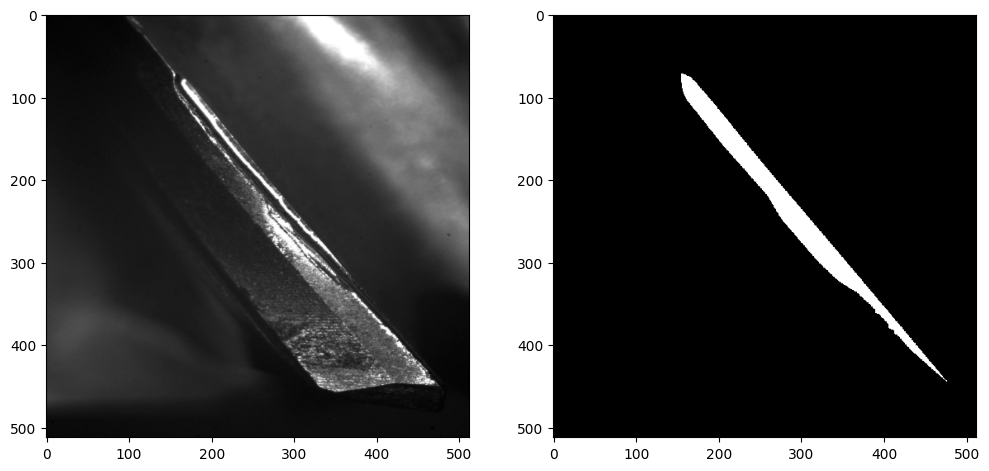

In [57]:
import random
import matplotlib.pyplot as plt

image_number = random.randint(0, len(X_test))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (512, 512)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (512, 512)), cmap='gray')
plt.show()

# 2.3. Train The Model

* TASK:
    * Define the dimensions of the image dataset (image_dataset) as follows:
        * IMG_HEIGHT = image_dataset.shape[1]
        * IMG_WIDTH = image_dataset.shape[2]
        * IMG_CHANNELS = image_dataset.shape[3]
    * Implement a function to retrieve a U-Net model with the specified dimensions
    * Train the model using the training data (X_train, y_train) and validate it using the testing data (X_test, y_test)
    * Save the trained model to the specified location

In [58]:

USE_PRETRAINED_MODEL = False

In [59]:
os.environ["SM_FRAMEWORK"] = "tf.keras"   # tell segmentation_models to use tf.keras
from segmentation_models import Unet
from keras.optimizers import Adam

IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]


def get_model():
    # 1) Define input shape to match your data
    INPUT_SHAPE = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

    # 2) Choose a backbone and load pretrained weights
    BACKBONE = "resnet34"        # try 'resnet34', 'efficientnetb0', etc.
    ENCODER_WEIGHTS = "imagenet" # use None if you want random init

    # 3) Instantiate the model
    model = Unet(
        BACKBONE, 
        input_shape=INPUT_SHAPE,
        encoder_weights=ENCODER_WEIGHTS,
        classes=1,
        activation="sigmoid"
    )

    # 4) Compile just like before
    model.compile(
        optimizer=Adam(1e-4),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    model.summary()

    return model

if USE_PRETRAINED_MODEL:
    model = get_model()

* TASK: Train the model with different parameters and try to reach the best results

In [60]:
import tensorflow as tf

# 1. List all physical GPU devices
gpus = tf.config.list_physical_devices('GPU')
print("GPUs found:", gpus)

# 2. Check whether the runtime was built with CUDA support
print("Built with CUDA:", tf.test.is_built_with_cuda())

# 3. Check if at least one GPU is available
print("GPU available:", tf.config.list_physical_devices('GPU') != [])

# 4. (Older TF) tf.test.is_gpu_available
#    Note: Deprecated in recent TF versions; use method #3 instead.
print("Legacy GPU check:", tf.test.is_gpu_available(cuda_only=True))


GPUs found: []
Built with CUDA: True
GPU available: False
Legacy GPU check: False


In [61]:
# Train the model
history = model.fit(X_train, y_train, 
                    batch_size = 8, 
                    verbose=True, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)
# Save the trained model
model.save("../model.h5")

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 128s 15s/step - accuracy: 0.2994 - loss: 1.1067 - mean_io_u_4: 0.4928 - val_accuracy: 0.8859 - val_loss: 0.4708 - val_mean_io_u_4: 0.4898
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 130s 16s/step - accuracy: 0.5007 - loss: 0.9615 - mean_io_u_4: 0.4926 - val_accuracy: 0.7889 - val_loss: 0.6309 - val_mean_io_u_4: 0.4889
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 118s 15s/step - accuracy: 0.6639 - loss: 0.8680 - mean_io_u_4: 0.4917 - val_accuracy: 0.7465 - val_loss: 0.7260 - val_mean_io_u_4: 0.4888
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 140s 15s/step - accuracy: 0.7649 - loss: 0.7918 - mean_io_u_4: 0.4907 - val_accuracy: 0.7827 - val_loss: 0.6769 - val_mean_io_u_4: 0.4884
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 118s 15s/step - accuracy: 0.8336 - loss: 0.7209 - mean_io_u_4: 0.4903 - val_accuracy: 0.8743 - val_loss: 0.5416 - val_mean_io_u_4: 0.4880
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 118s 15s/step - accuracy: 0.8653 - loss: 0.6545 - mean_io_u_4: 0.4906 - val_accuracy: 0.

# 2.4. Extracting Accuracy Parameters
Now, let's delve into the process of extracting accuracy parameters from our model. This task involves two main components:

TASK:

* Extracting Accuracy and Loss Diagrams with Epochs:
    * One fundamental aspect of assessing a model's performance is tracking its accuracy and loss over epochs. By visualizing these metrics over the course of training, we gain insights into how well our model is learning and whether it's overfitting or underfitting. We'll extract these diagrams to analyze the trends and make informed decisions about model adjustments.

* Calculating the Intersection over Union (IOU) Level:
    * Another critical metric for evaluating the performance of models, especially in tasks like object detection and semantic segmentation, is the Intersection over Union (IOU). This metric quantifies the overlap between predicted and ground-truth bounding boxes or segmentation masks. By calculating the IOU level, we can gauge how accurately our model is delineating objects or regions of interest within the data.

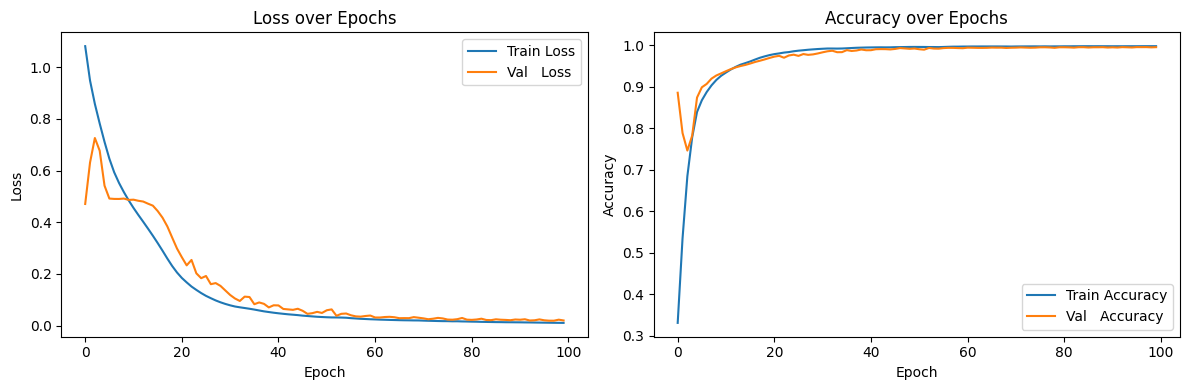

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import jaccard_score

# --- 1. Plot training & validation accuracy and loss over epochs ---
loss     = history.history['loss']
val_loss = history.history['val_loss']
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(loss,     label='Train Loss')
plt.plot(val_loss, label='Val   Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(acc,      label='Train Accuracy')
plt.plot(val_acc,  label='Val   Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



In [63]:
# --- 2. Calculate Intersection over Union (IoU) on test set ---
# 2.1 Get predictions and threshold to binary masks
y_pred = model.predict(X_test)
y_pred_thresh = (y_pred > 0.5).astype(np.uint8)

# 2.2 Flatten arrays for jaccard_score
y_true_flat = y_test.flatten()
y_pred_flat = y_pred_thresh.flatten()

# 2.3 Compute IoU (Jaccard Index)
iou_score = jaccard_score(y_true_flat, y_pred_flat, average='binary')

print("IoU score is:", iou_score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
IoU score is: 0.8447927199191102


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


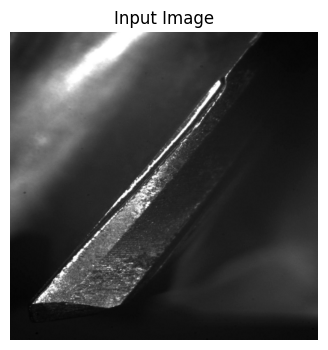

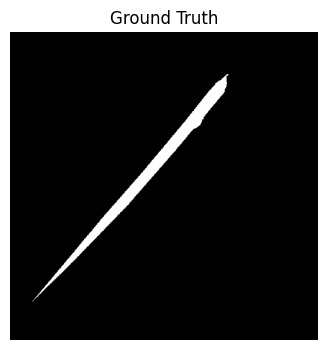

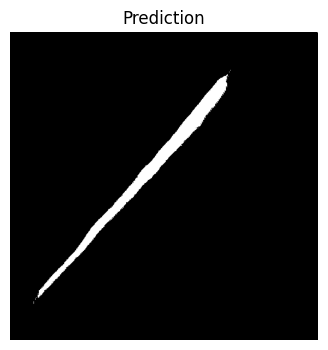

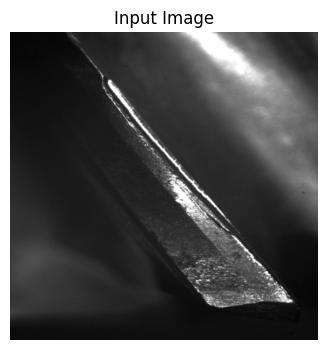

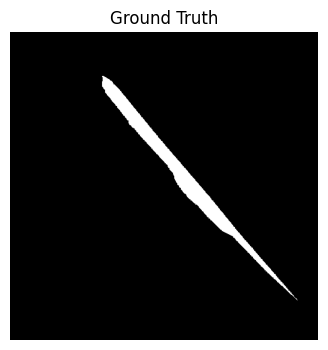

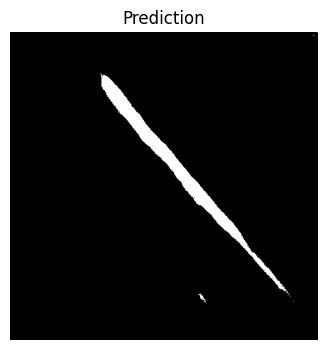

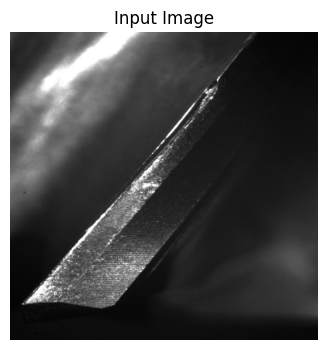

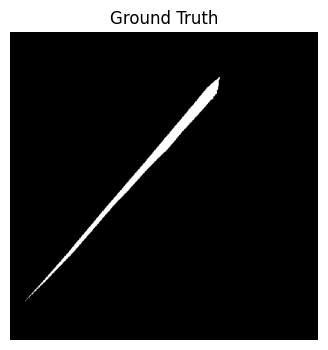

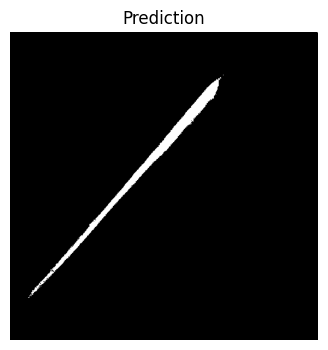

In [64]:
# 1) Get predictions and threshold to binary
y_pred = model.predict(X_test[:3])
y_pred_thresh = (y_pred > 0.5).astype(np.uint8)

# 2) Loop over a few examples
for i in range(3):
    # Input image
    plt.figure(figsize=(4,4))
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title('Input Image')
    plt.axis('off')
    plt.show()

    # Ground truth mask
    plt.figure(figsize=(4,4))
    plt.imshow(y_test[i].squeeze(), cmap='gray')
    plt.title('Ground Truth')
    plt.axis('off')
    plt.show()

    # Predicted mask
    plt.figure(figsize=(4,4))
    plt.imshow(y_pred_thresh[i].squeeze(), cmap='gray')
    plt.title('Prediction')
    plt.axis('off')
    plt.show()


At the end of this notebook I recommend you to book a coustliting time to check your result and to clarify it in case of doubt ;)